In [42]:
import glob
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
lst_fire_img = glob.glob('./fire_dataset/fire_images/*.png')
lst_non_fire_img = glob.glob('./fire_dataset/non_fire_images/*.png')

In [3]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images without fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images without fire : 243


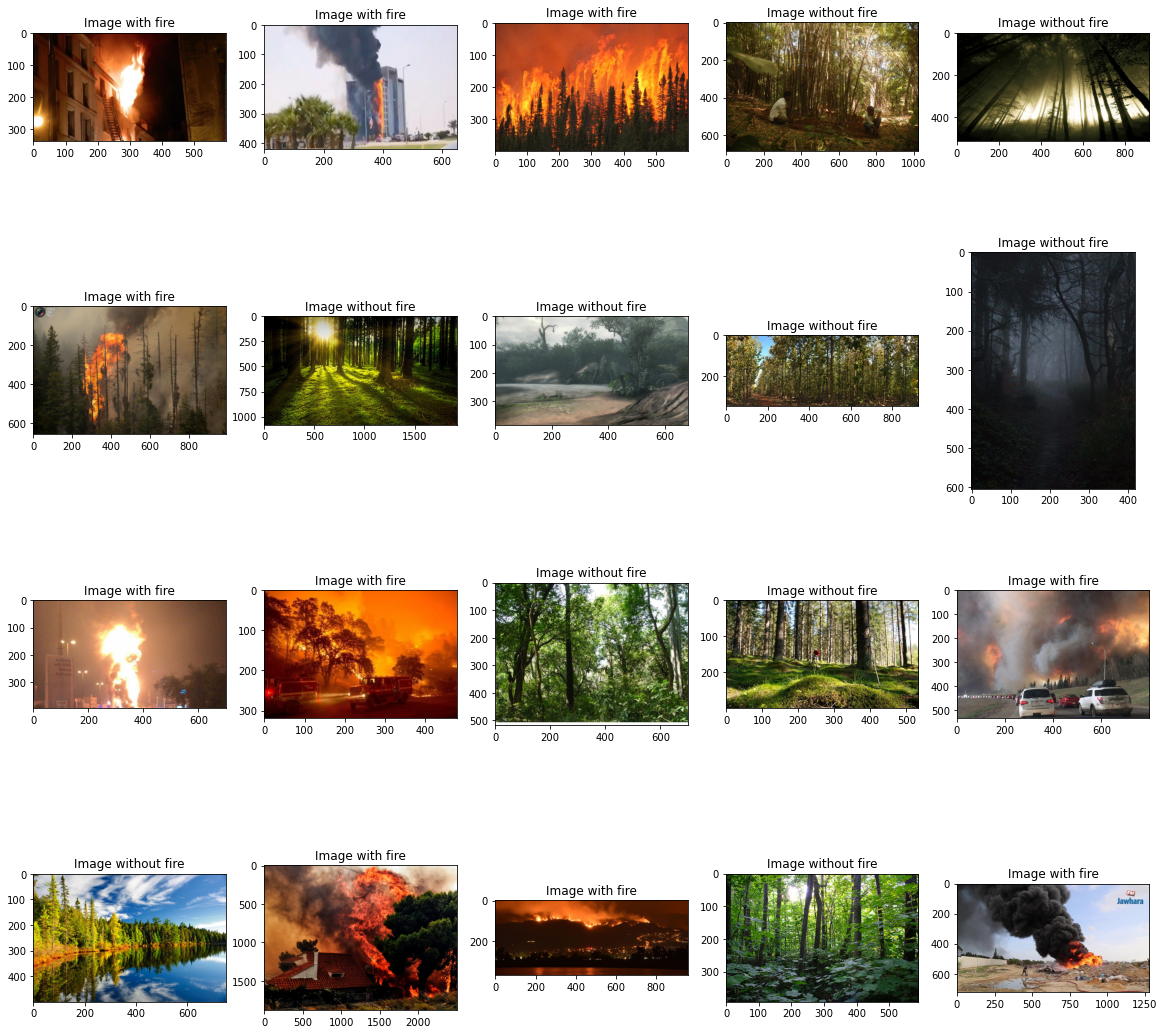

In [8]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)
plt.figure(figsize = (20,20))
for i in range(len(lst_images_random)):
    plt.subplot(4,5,i+1)
    img = cv2.imread(lst_images_random[i])
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    plt.imshow(img,cmap = 'gray')
    if "non_fire" in lst_images_random[i]:
        
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")
plt.show()

In [11]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [16]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,./fire_dataset/non_fire_images\non_fire.165.png,0
1,./fire_dataset/fire_images\fire.203.png,1
2,./fire_dataset/non_fire_images\non_fire.27.png,0
3,./fire_dataset/fire_images\fire.13.png,1
4,./fire_dataset/fire_images\fire.321.png,1
5,./fire_dataset/fire_images\fire.182.png,1
6,./fire_dataset/fire_images\fire.250.png,1
7,./fire_dataset/fire_images\fire.517.png,1
8,./fire_dataset/fire_images\fire.66.png,1
9,./fire_dataset/fire_images\fire.567.png,1


In [17]:
df.shape

(998, 2)

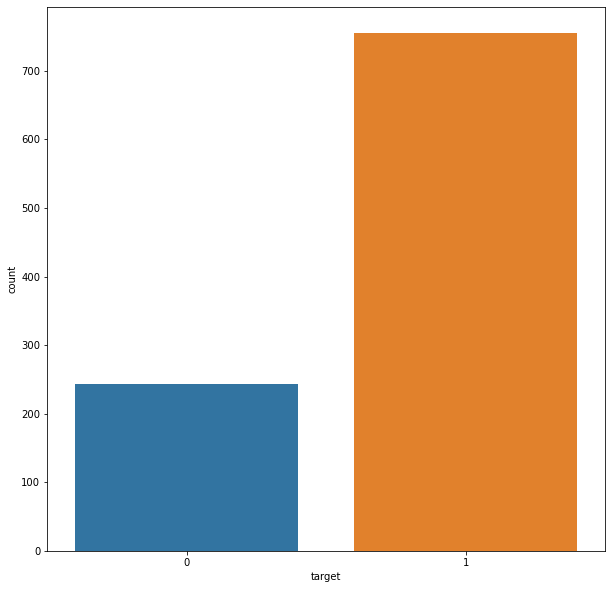

In [20]:
plt.figure(figsize = (10,10))
sns.countplot(x = "target",data = df)
plt.show()

In [21]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) 
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) 
  img = cv2.resize(img,(196,196))  
  img = img / 255 
  return img 

In [22]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  
  return np.array(X),np.array(y)

In [25]:
X, y = create_format_dataset(df)

In [26]:
X.shape,y.shape

((998, 196, 196, 3), (998,))

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [35]:
model=Sequential([
    Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'),
    Conv2D(64,(2,2),activation='relu'),
    MaxPooling2D(),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128),
    Dense(1,activation= "sigmoid")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 195, 195, 128)     1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 97, 97, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 73728)            

In [36]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
22/22 [==============================] - 118s 5s/step - loss: 0.7096 - accuracy: 0.8109 - val_loss: 0.1662 - val_accuracy: 0.9300
Epoch 2/30
22/22 [==============================] - 121s 5s/step - loss: 0.1659 - accuracy: 0.9427 - val_loss: 0.1290 - val_accuracy: 0.9433
Epoch 3/30
22/22 [==============================] - 116s 5s/step - loss: 0.1317 - accuracy: 0.9441 - val_loss: 0.1713 - val_accuracy: 0.9267
Epoch 4/30
22/22 [==============================] - 125s 6s/step - loss: 0.0785 - accuracy: 0.9771 - val_loss: 0.1460 - val_accuracy: 0.9333
Epoch 5/30
22/22 [==============================] - 116s 5s/step - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.1516 - val_accuracy: 0.9533
Epoch 6/30
22/22 [==============================] - 101s 5s/step - loss: 0.0474 - accuracy: 0.9842 - val_loss: 0.1649 - val_accuracy: 0.9500
Epoch 7/30
22/22 [==============================] - 109s 5s/step - loss: 0.0293 - accuracy: 0.9928 - val_loss: 0.2075 - val_accuracy: 0.9367
Epoch 8/30
22

In [37]:
y_pred = model.predict(X_test)

10/10 [==============================] - 9s 889ms/step


In [38]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [39]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

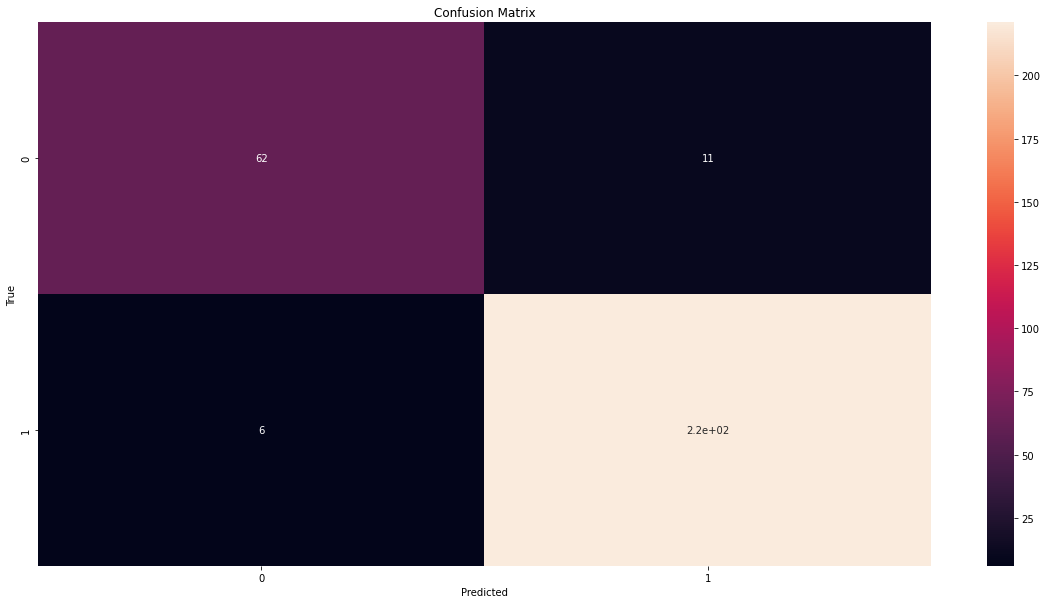

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()